# Is renting or buying a better idea?
## Why people say renting it *BAD*?
The common argument against renting is that rents do not go towards
building equity. More importantly, they increase with inflation, so
rents will likely appreciate in the future. By buying a house, you
basically convert rent to interest, which decreases over time due to
amortization. Even if I am being generous and look at long term loans,
monthly interest rates payment will likely be lower than rent for the same
apartment.

The next thing to take into account is the mortgage payment. While the
portion that covers interest is lower than rent, the total amount is likely
higher. It can easily take a toll on a family's cash flow and liquidity. It
also commits the owner to **invest in real estate**. How does that work?

## Buying a house is a real estate investment.
When you take out a long term loan, you are promising to put
aside a certain amount of money each month to pay off the loan. Another way to look
at it is that you are putting some money aside towards building equity in real
estate. To elaborate, suppose you pay off a portion of the loan, and the
house appreciates in the mean time. By selling the house, and paying off
the debt, you immediately make a capital gain using the money you 'invested'
in the house. (We are ignoring fixed cost for now, which can be significant)
It is akin to trading on margin.

## Rent vs Buying
The question boils down to whether the difference in real estate and other
gains, and their fixed costs make it worthwhile for either investment. We
will compare between two scenarios:

1. We buy a house and sell it after x number of years. There is some fixed
  cost, and monthly mortage repayment.
2. We rent a house, and invest the rest of our money in a safe investment.
  Rent is expected to increase with inflation.

## Comparing between different repayment terms
We will look at different x to get an idea when a crossover happens.


In [70]:
import finanpy as fp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Suppose we pay off the mortgage after 30 years. We assume that rent increases at the same
rate as property appreciation. We also assume that rent is valued at a
price-to-rent ratio of 30 years in Singapore. These are assumptions we will
soften later primarily because:

1. Most properties are 99 year lease, so there is an inherent depreciation.
1. Consequently, rent may appreciate more than property prices.

Home loan interest rates are based on HDB rates of 2.6%. Risk free
interest is generally around 5% on the conservative side. We
demonstrate how the difference in savings is calculated below.


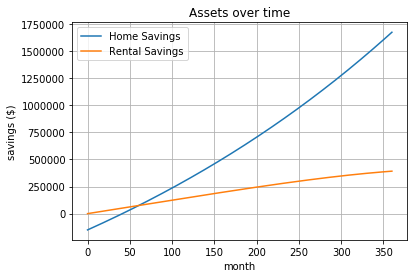

In [71]:
Y = 30 # Number of years
p = 1000000
rent = p/30/12.
inflation = 0.02 # Rental inflation
REr = inflation # Real estate growth
Rr = 0.05 # Low risk interest
fc = 0.15 # fixed cost

# Annual interest rates for Y number of years
pa = np.zeros(Y) + 0.026  # This is the rate for a HDB Loan
output = fp.amortize_schedule(p, pa)  # Month, c, cp, ci, debt, ti
Ti = output['ti']  # Total Interest over time
Tpp = np.cumsum(output['cp'])  # Total Principal Paid

# Calculating Home Savings
Hp = [p*(1+REr/12)**y for y in range(Y*12+1)]  # House price
Hs = np.array(Hp) - fc*p - output['debt'] # Home savings

# Calculating Rental Savings
rr = [rent*(1+inflation/12)**y for y in range(Y*12)] # real rent
Rs = fp.save_series((np.array(output['c'][1:]) - rr), Rr, Y)

plt.figure()
plt.ion()
plt.plot(range(Y*12+1), Hs, label='Home Savings')
plt.plot(range(Y*12+1), Rs, label='Rental Savings')
plt.xlabel('month')
plt.ylabel('savings ($)')
plt.title('Assets over time')
plt.legend()
plt.grid()


Below are three examples of 3 different payment terms. 30,20 and 40.


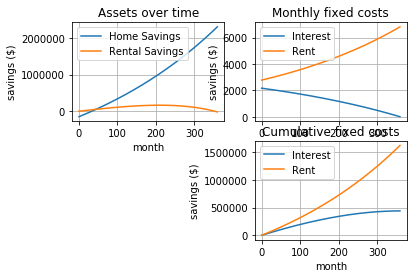

In [72]:
Y = 30 # Number of years
p = 1000000
rent = p/30/12.
inflat = 0.03
fp.homevsrent(Y, 1000000, inflat, rent, inflat, 0.05, 0.15)  # Y,p,Rer,rent,inflation,Rr,fc


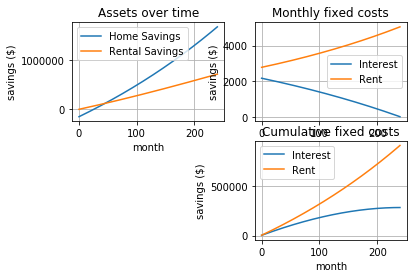

In [73]:
Y = 20 # Number of years
p = 1000000
rent = p/30/12.
inflat = 0.03
fp.homevsrent(Y, 1000000, inflat, rent, inflat, 0.05, 0.15)  # Y,p,Rer,rent,inflation,Rr


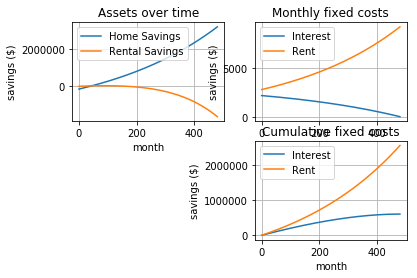

In [74]:
Y = 40 # Number of years
p = 1000000
rent = p/30/12.
inflat = 0.03
fp.homevsrent(Y, 1000000, inflat, rent, inflat, 0.05, 0.15)  # Y,p,Rer,rent,inflation,Rr


From the plots above, depending on the length of repayment, savings you get
by renting will always be lower than buying a house.
Also, regardless of term of loan, if you decide to sell the house within 5
years of buying, the fixed cost from a home purchase will eat into profits.
If the fixed cost is large enough, it can be better to rent,
assuming the end goal is to sell the house.

Interestingly, notice how savings take a dive when renting long term. The inflation
in rental starts eating into savings.

## What if investment interest rates fall or increase?

As you will see below, while a strong investment return will generate
savings, it is mostly erased by the ever-increasing rent, which is the
biggest downside to renting compared to buying a house. Only in
situations where equity returns far outweigh the appreciation of real
estate (home and/or rent) do you see substantial benefit with renting
after a long time. The risk is also much higher since you need the
consistently large return year on year while rent increases has to be
really low and even then, you don't see a significant increase in savings.


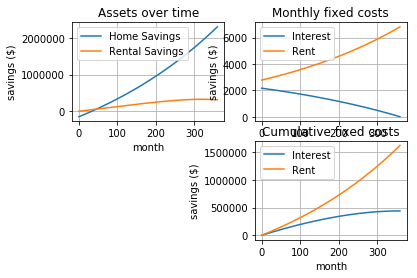

In [75]:
Y = 30 # Number of years
p = 1000000
rent = p/30/12.
inflat = 0.03
fp.homevsrent(Y, 1000000, inflat, rent, inflat, 0.08, 0.15)  # Y,p,Rer,rent,inflation,Rr,fc


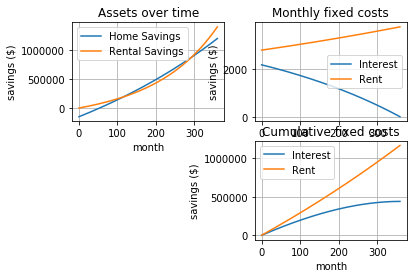

In [76]:
Y = 30 # Number of years
p = 1000000
rent = p/30/12.
inflat = 0.01
fp.homevsrent(Y, 1000000, inflat, rent, inflat, 0.08, 0.15)  # Y,p,Rer,rent,inflation,Rr,fc


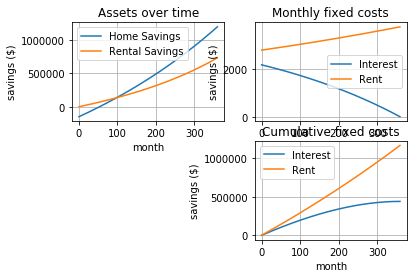

In [77]:
Y = 30 # Number of years
p = 1000000
rent = p/30/12.
inflat = 0.01
fp.homevsrent(Y, 1000000, inflat, rent, inflat, 0.05, 0.15)  # Y,p,Rer,rent,inflation,Rr,fc
